In [107]:
from datetime import datetime, timedelta
from faker import Faker 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
import openpyxl

fake = Faker()

dt_specie = pd.read_excel("/home/barry/Documents/PythonProjects/Test/specie_data.xlsx")

In [108]:
dt_specie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         75 non-null     object 
 1   Adult height    75 non-null     float64
 2   Child's height  75 non-null     float64
 3   Adult weight    75 non-null     float64
 4   Child's weight  75 non-null     float64
 5   Lifespan        75 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [109]:
dt_specie.to_numpy()

array([['Chinese Alligator', 220.0, 44.0, 45.0, 4.5, 50],
       ['Venezuelan Amazon', 41.0, 8.2, 0.34, 0.034, 60],
       ['Yellow-faced Amazon', 37.0, 7.4, 0.34, 0.034, 50],
       ['Blue-faced Amazon', 54.5, 10.9, 0.52, 0.052, 70],
       ['White-tailed wildebeest', 120.0, 24.0, 170.0, 17.0, 20],
       ['Black Antelope', 90.0, 18.0, 170.0, 17.0, 20],
       ['Red Macaw', 90.0, 18.0, 1.25, 0.125, 80],
       ['Yellow macaw', 147.0, 29.4, 1.3, 0.13, 50],
       ['Big cormorant', 100.0, 20.0, 3.0, 0.3, 20],
       ['Snow leopard (Snow Leopard)', 120.0, 24.0, 30.0, 3.0, 20],
       ['Panamanian Psalmopeus', 23.0, 4.6, 0.15, 0.015, 15],
       ['Golden Eagle', 93.0, 18.6, 5.0, 0.5, 50],
       ['Ordinary beaver', 80.0, 16.0, 30.0, 3.0, 20],
       ['Bristly Armadillo', 38.0, 7.6, 0.9, 0.09, 16],
       ['Vicuna', 150.0, 30.0, 50.0, 5.0, 20],
       ['Mexican Venomous tooth', 90.0, 18.0, 45.0, 4.5, 30],
       ['Raven', 70.0, 14.0, 0.14, 0.014, 40],
       ['Horned Raven', 115.0, 23.0, 6

In [110]:
def generate_date(start_date, end_date):
    return fake.date_time_between(start_date=start_date, end_date=end_date)


def create_file(file_path, header, data_generator, num_rows):
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
        workbook  = writer.book
        worksheet = workbook.add_worksheet()
        worksheet.write_row(0, 0, header)
        for i in range(num_rows):
            row_data = data_generator(i)
            worksheet.write_row(i + 1, 0, row_data)
            


def create_animals_row(row_id):
    if num_species[0] != 0:
        num_species[0] -= 1
    else:
        if num_species[1] == len(dt_specie) - 1:
            num_species[1] = 0
        else:
            num_species[1] += 1
            num_species[0] = numb_per_species

    entry_date_end = datetime.now()
    entry_date_start = entry_date_end - timedelta(days=int(dt_specie["Lifespan"][num_species[1]] * 365))
    entry_date = generate_date(entry_date_start, entry_date_end)
    difference = datetime.now() - entry_date
    height = 0
    weight = 0

    if (difference > timedelta(days=int(dt_specie["Lifespan"][num_species[1]] * 110))):
        maturity = True
        height = round(random.uniform(dt_specie["Child's height"][num_species[1]], dt_specie['Adult height'][num_species[1]]), 2)
        weight = round(random.uniform(dt_specie["Child's weight"][num_species[1]], dt_specie['Adult weight'][num_species[1]]), 2)
    else:
        maturity = False
        height = round(random.uniform(1.0, dt_specie["Child's height"][num_species[1]]), 2)
        weight = round(random.uniform(1.0, dt_specie["Child's weight"][num_species[1]]), 2)

    gender = random.choice(["Самец", "Самка"])
    return [fake.name().split()[0],entry_date.strftime('%Y-%m-%dT%H:%M:%S') , dt_specie['Species'][num_species[1]], maturity, weight, height, gender]



In [111]:
your_path = '/home/barry/Documents/DataTest/'
numb_per_species = 7
num_species = [numb_per_species,0]
num_rows = 490

In [112]:
animals_file_path = your_path + 'Animval.xlsx'
create_file(animals_file_path, ["Кличка", "Дата появления", "Вид","Зрелость", "Вес", "Рост", "Пол"],
            create_animals_row, num_rows)

In [113]:
dt_gd = pd.read_excel("/home/barry/Documents/DataTest/Animval.xlsx", )

In [114]:
dt_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Кличка          490 non-null    object 
 1   Дата появления  490 non-null    object 
 2   Вид             490 non-null    object 
 3   Зрелость        490 non-null    bool   
 4   Вес             490 non-null    float64
 5   Рост            490 non-null    float64
 6   Пол             490 non-null    object 
dtypes: bool(1), float64(2), object(4)
memory usage: 23.6+ KB


In [115]:
dt_gd.head(3)

,Кличка,Дата появления,Вид,Зрелость,Вес,Рост,Пол
0,Vanessa,2022-08-17T08:56:49,Chinese Alligator,False,1.80,17.42,Самец
1,Vicki,2003-08-05T11:43:15,Chinese Alligator,True,33.48,207.11,Самец
2,Vincent,1981-10-16T23:38:52,Chinese Alligator,True,38.69,178.60,Самка


In [116]:
dt_gd.tail(3)

,Кличка,Дата появления,Вид,Зрелость,Вес,Рост,Пол
487,Wesley,2023-01-13T03:36:35,White-breasted hedgehog,False,0.64,4.25,Самец
488,Alexander,2020-05-31T00:15:43,White-breasted hedgehog,True,0.72,16.88,Самка
489,Tyler,2021-12-01T04:33:24,White-breasted hedgehog,True,0.09,22.41,Самец


In [117]:
dt_gd.describe()

,Вес,Рост
count,490.000000,490.000000
mean,7.707061,42.876265
std,23.087668,40.580940
min,0.010000,1.050000
25%,0.440000,13.100000
50%,0.865000,29.800000
75%,2.407500,61.540000
max,189.220000,241.730000


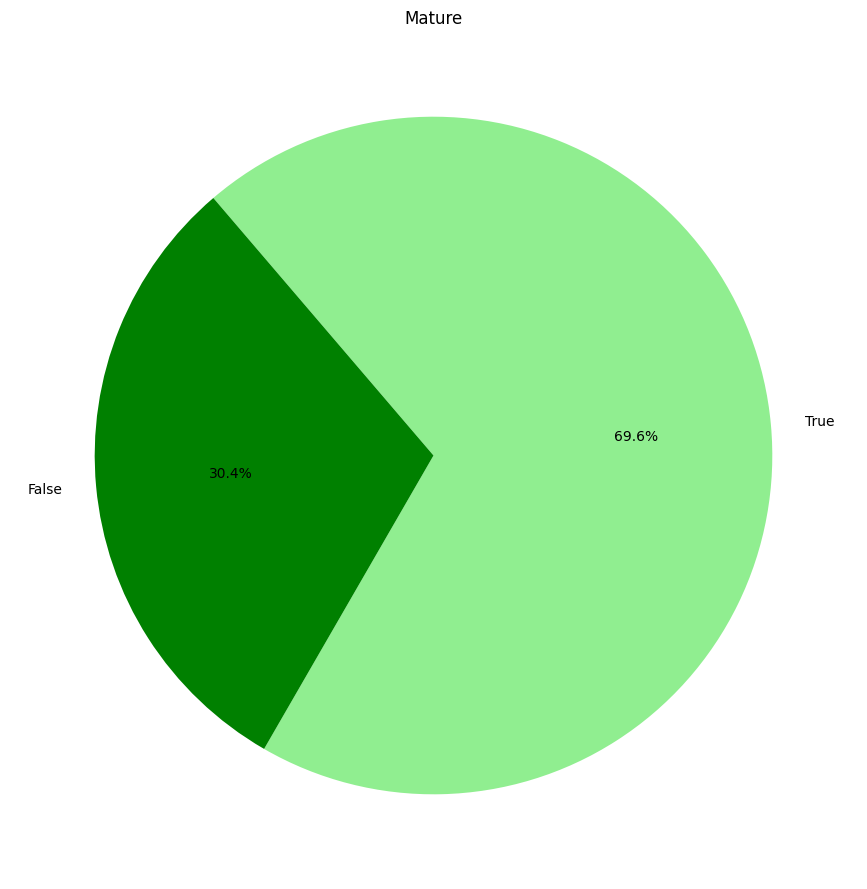

In [118]:
mature_counts = dt_gd['Зрелость'].value_counts()

plt.figure(figsize=(11, 11), facecolor='White')
plt.pie(mature_counts, labels=mature_counts.index, autopct='%1.01f%%', startangle=240, colors=['LightGreen', 'green'])
plt.title('Mature')
plt.show()